# ML Naive Bayes Classifer

This note book is for learning Naive Bayes Classifier in-depth and improve accuracy of the classifier. The data set used is heart.csv, to predict heart attack based on the different parameters and historical data set of the patients

In [13]:
# import all the packages

#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


In [207]:
# Import data set
data = pd.read_csv("C:/Users/punee/BITS_PYTHON/Data_set/heart.csv")
data.head()

## data processing

data['Sex'] = data['Sex'].apply(lambda x: '1' if x == 'M' else '0')

data.loc[data['ChestPainType'] == 'ATA', 'ChestPainType'] = '0'
data.loc[data['ChestPainType'] == 'NAP', 'ChestPainType'] = '1' 
data.loc[data['ChestPainType'] == 'TA', 'ChestPainType']  = '2' 
data.loc[data['ChestPainType'] == 'ASY', 'ChestPainType'] = '3' 

data.loc[data['RestingECG'] == 'Normal', 'RestingECG'] = '0' 
data.loc[data['RestingECG'] == 'ST', 'RestingECG']     = '1' 
data.loc[data['RestingECG'] == 'LVH', 'RestingECG']    = '2' 

data.loc[data['ExerciseAngina'] == 'N', 'ExerciseAngina'] = '0' 
data.loc[data['ExerciseAngina'] == 'Y', 'ExerciseAngina'] = '1' 

data.loc[data['ST_Slope'] == 'Up', 'ST_Slope'] = '0' 
data.loc[data['ST_Slope'] == 'Flat', 'ST_Slope']     = '1' 
data.loc[data['ST_Slope'] == 'Down', 'ST_Slope']    = '2' 


data_copy = data.copy()    
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   1             0        140          289          0          0    172   
1   49   0             1        160          180          0          0    156   
2   37   1             0        130          283          0          1     98   
3   48   0             3        138          214          0          0    108   
4   54   1             1        150          195          0          0    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              0      0.0        0             0  
1              0      1.0        1             1  
2              0      0.0        0             0  
3              1      1.5        1             1  
4              0      0.0        0             0

In [40]:
## seperation of quatitiative and qualitatiive data

#data_contnus = pd.DataFrame(data, columns=['Name', 'Age'])

cat_cols = pd.DataFrame(data, columns=['Sex', 'ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope' ,'HeartDisease' ])

cont_cols = pd.DataFrame(data, columns=['Age', 'RestingBP','Cholesterol','MaxHR' ,'Oldpeak','HeartDisease' ])

cat_cols.head()

cont_cols.head()

cont_cols.describe().transpose()


count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

In [41]:
pp.ProfileReport(cont_cols)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

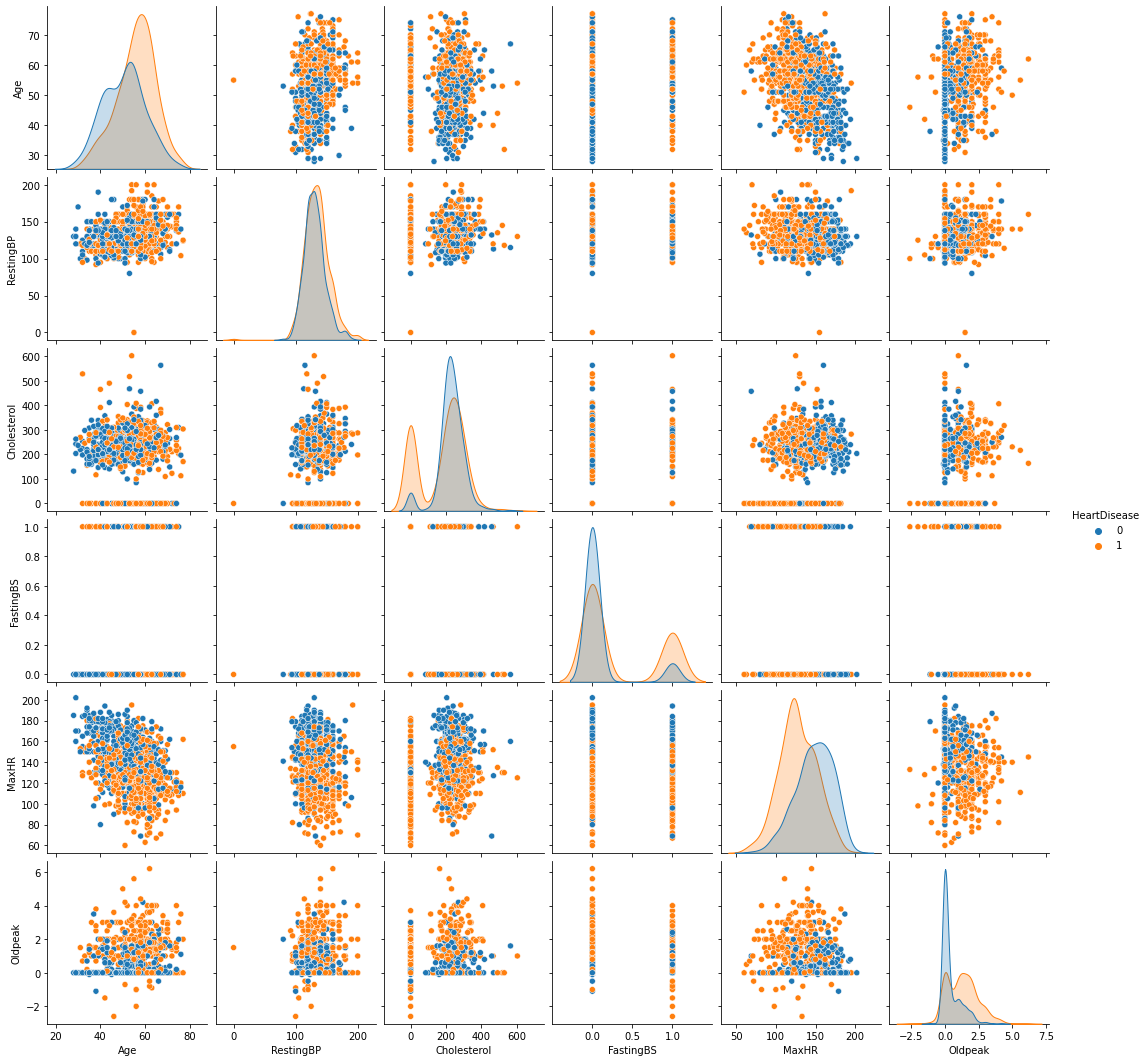

In [19]:
sns.pairplot(data, hue="HeartDisease")

In [209]:
# Model Prepration and training data set -- with original settings



y = data["HeartDisease"]
X = data.drop('HeartDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[59 18]
 [12 95]]


Accuracy of Naive Bayes model: 83.69565217391305 

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        77
           1       0.84      0.89      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



# Improvements

In [210]:
# Feature seletion

# number of columns
# Age	Sex	ChestPainType	RestingBP	Cholesterol	FastingBS	RestingECG	MaxHR	ExerciseAngina	Oldpeak	ST_Slope	HeartDisease

# there  no change when featturews were removed when feature was low coleation with target col


data = pd.DataFrame(data_copy, columns=[
    'Age', 
    #'RestingBP',
    'Cholesterol' ,
    'Oldpeak',
    'MaxHR',
    'Sex', 
    'ChestPainType',
    #'FastingBS',
   # 'RestingECG',
    'ExerciseAngina',
    'ST_Slope' ,
    'HeartDisease'
                ])
#data.head()

In [211]:
# Model Prepration and training data set



y = data["HeartDisease"]
X = data.drop('HeartDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))



confussion matrix
[[71 11]
 [10 92]]


Accuracy of Naive Bayes model: 88.58695652173914 

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        82
           1       0.89      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



### List of things imporoved accuracy
1.Feature seletion

2.stataification

3.changing the Random state